In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brent-oil-prices/BrentOilPrices.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/brent-oil-prices/BrentOilPrices.csv')
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Year'] = df['Date'].dt.year

In [6]:
df['Month'] = df['Date'].dt.month

In [7]:
df.columns

Index(['Date', 'Price', 'Year', 'Month'], dtype='object')

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df

,Price,Year,Month
Date,,,
1987-05-20,18.63,1987,5
1987-05-21,18.45,1987,5
1987-05-22,18.55,1987,5
1987-05-25,18.60,1987,5
1987-05-26,18.63,1987,5
...,...,...,...
2022-11-08,96.85,2022,11
2022-11-09,93.05,2022,11
2022-11-10,94.25,2022,11


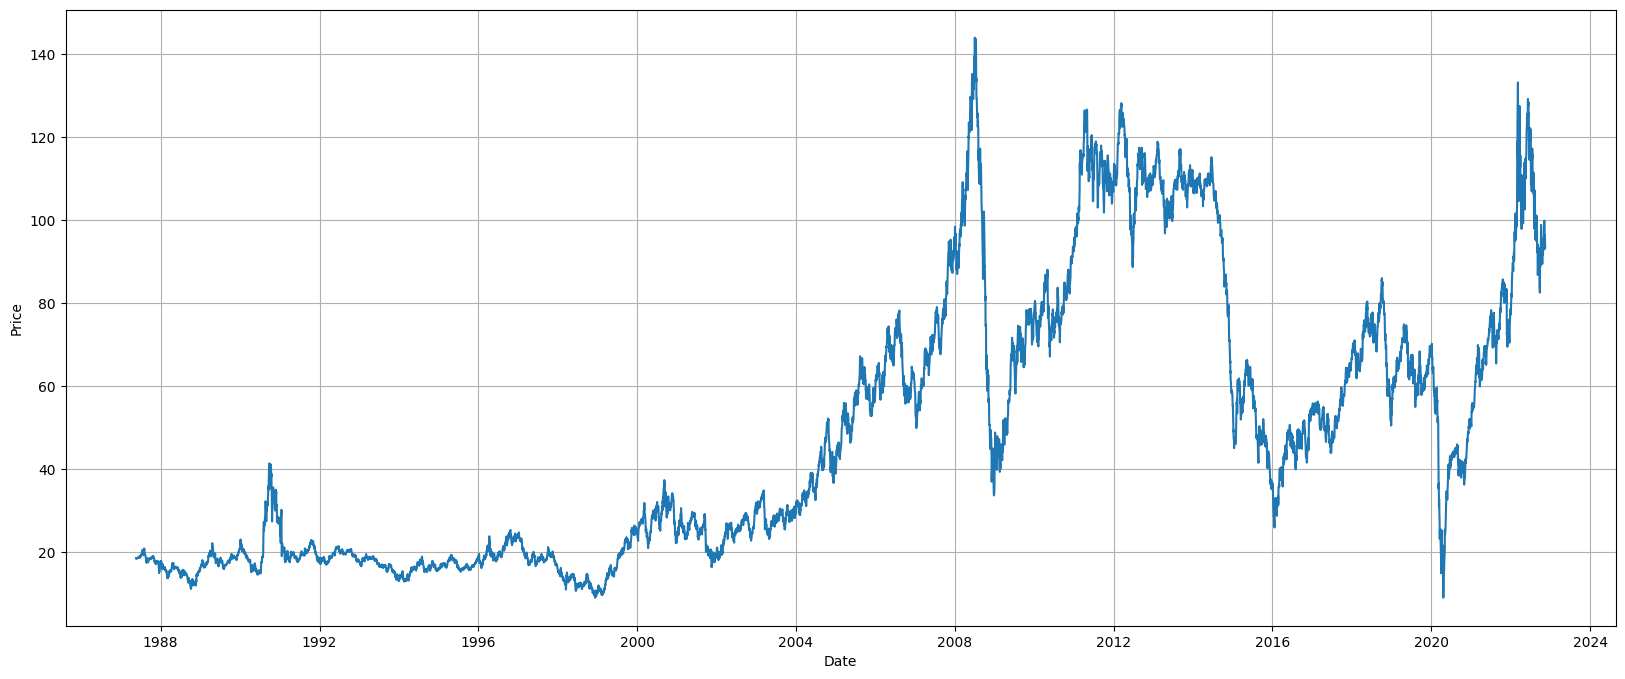

In [10]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x=df.index,y='Price')
plt.grid()

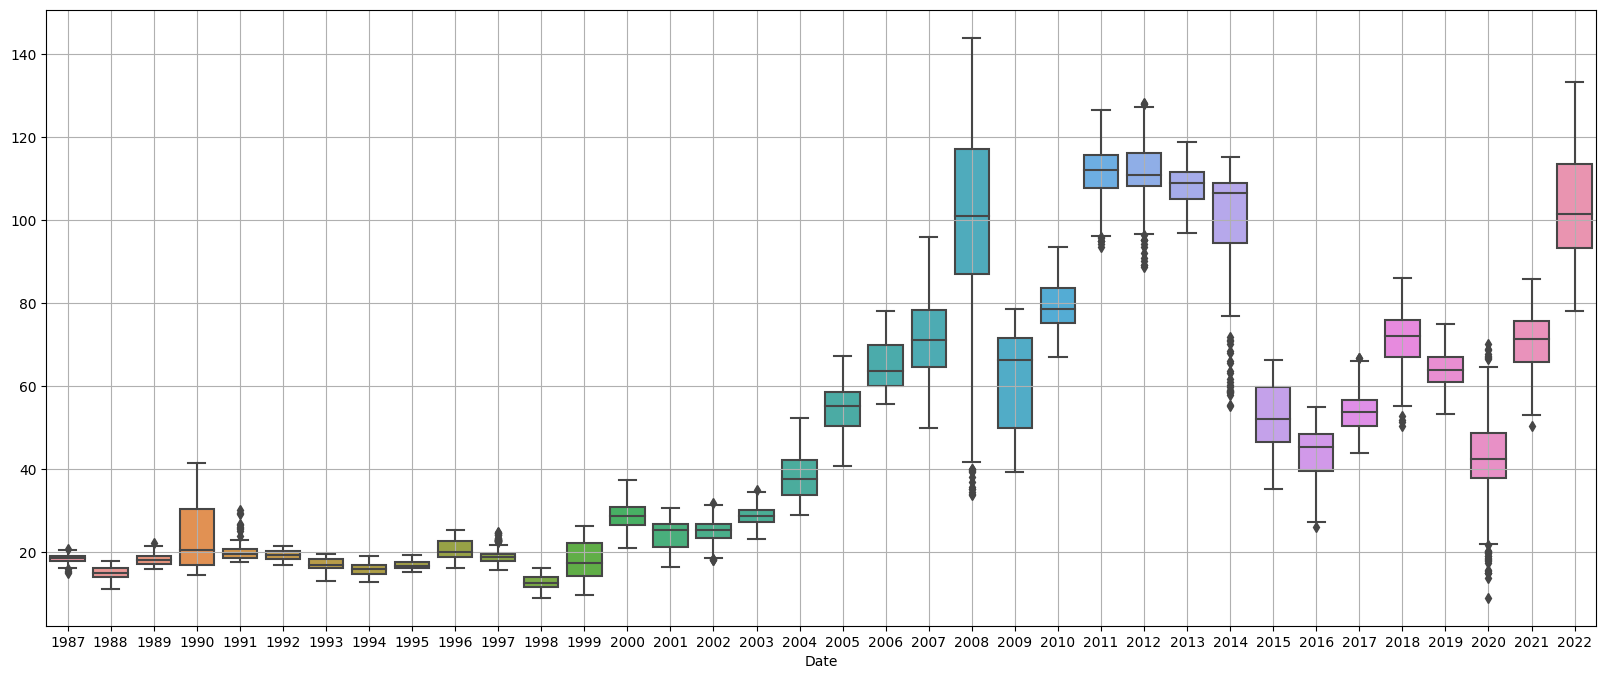

In [11]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.grid()

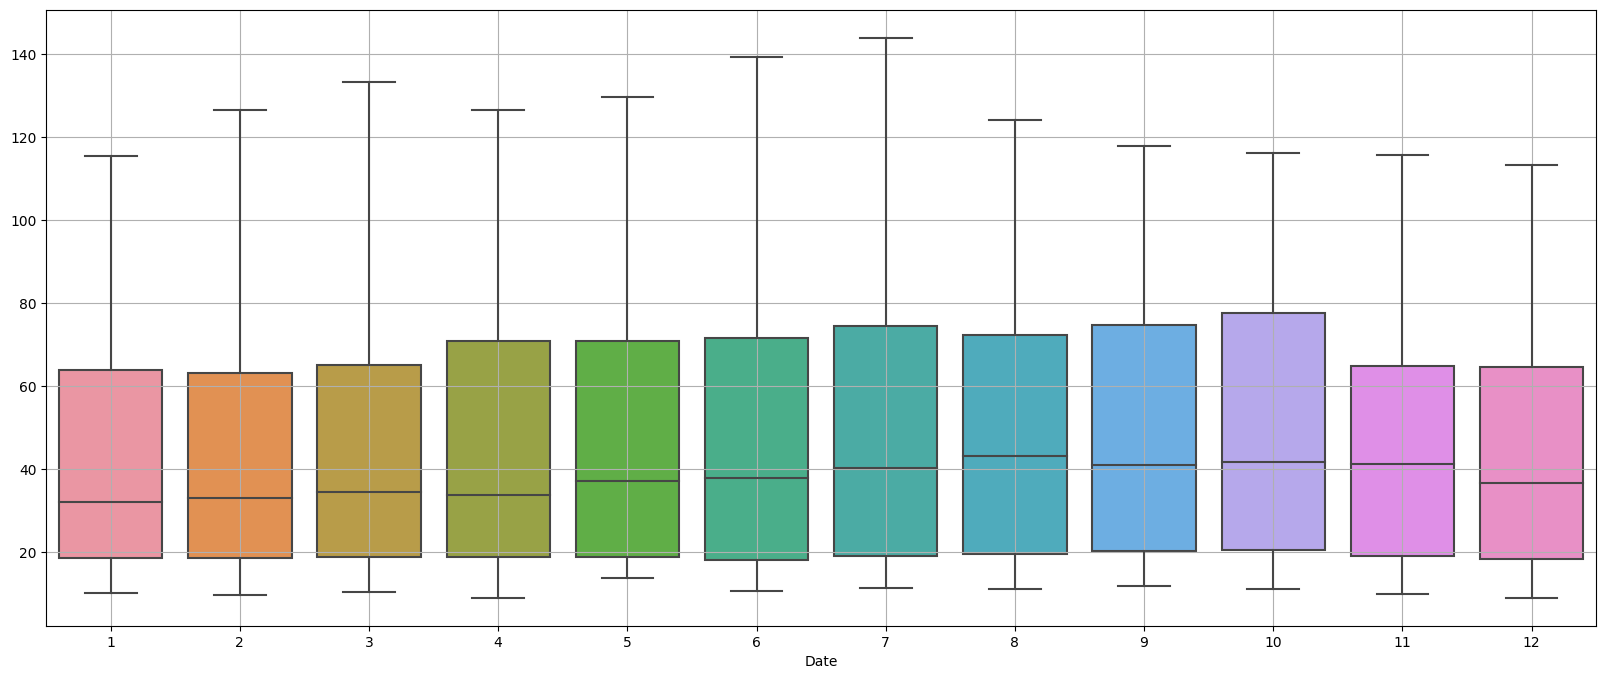

In [12]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month,y=df.values[:,0],ax=ax)
plt.grid()

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Price'])
result

(-1.9938560113924664,
 0.2892735048934034,
 29,
 8981,
 {'1%': -3.4310783342658615,
  '5%': -2.861861876398633,
  '10%': -2.566941329781918},
 28957.076110971866)

In [14]:
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: -1.993856
p-value: 0.289274


In [15]:
def adfuller_test(Price):
    result = adfuller(Price)
    label = ['ADF Test Statistics','p-value','$LAGS USED','Number Of Observation']
    for value,label in zip(result,label):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print('Strong Evedience Against Null Hypothesis (Ho), Reject Null Hypothesis,Data is Stationary')
    else:
        print('Week Evedience Against Null Hypothesis, Data is not Stationary')

In [16]:
adfuller_test(df['Price'])

ADF Test Statistics:-1.9938560113924664
p-value:0.2892735048934034
$LAGS USED:29
Number Of Observation:8981
Week Evedience Against Null Hypothesis, Data is not Stationary


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Price'],model='add',period=30)
decompose

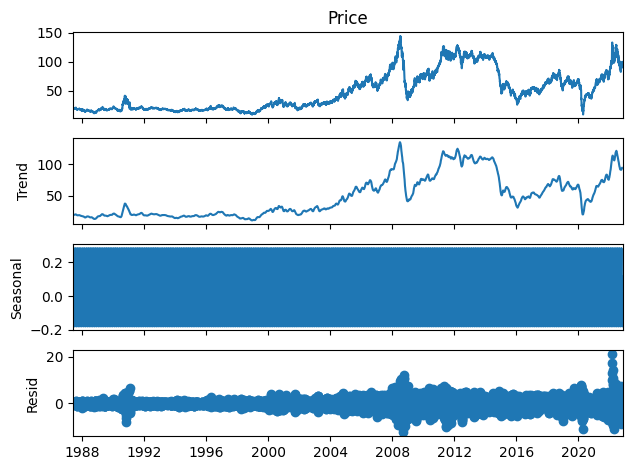

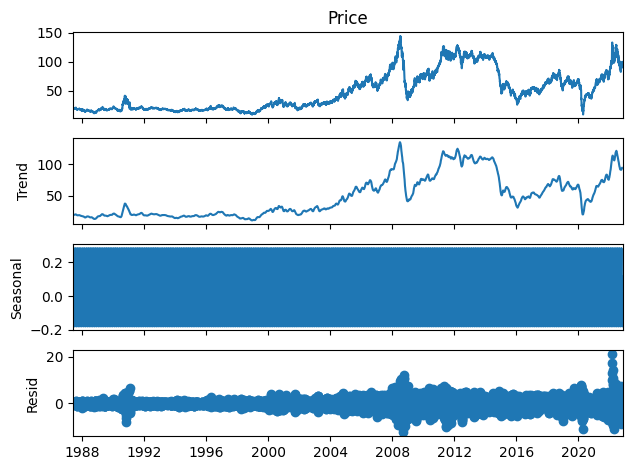

In [18]:
decompose.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

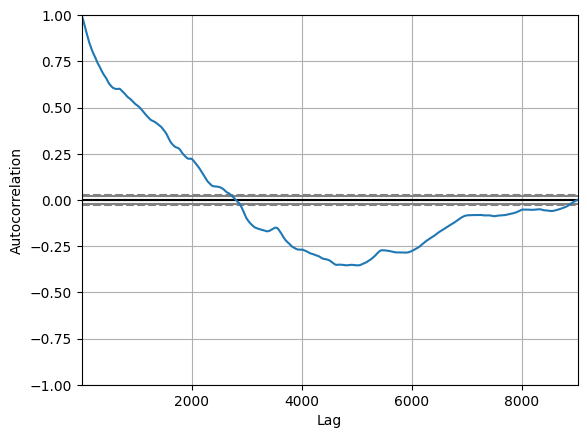

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Price'])

In [20]:
#ROLLING STATISTICS

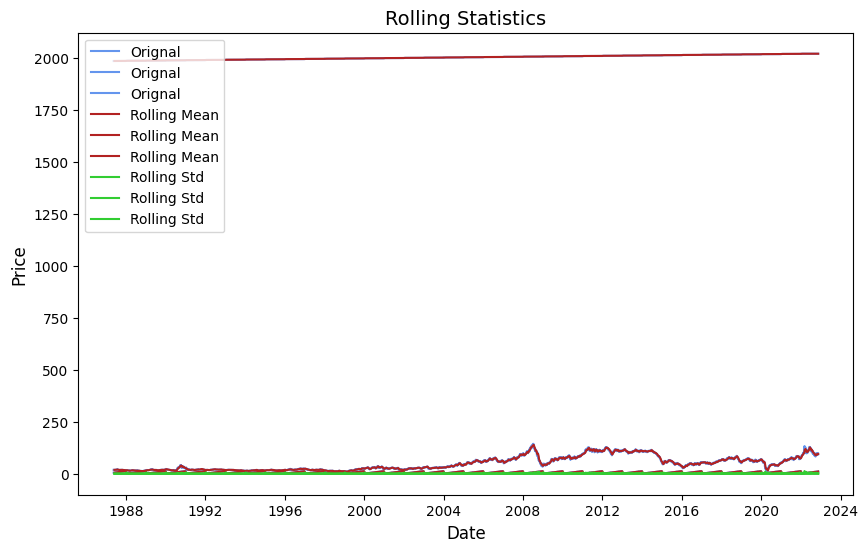

In [21]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(df,color='cornflowerblue',label='Orignal')
plt.plot(rolling_mean,color='firebrick',label='Rolling Mean')
plt.plot(rolling_std,color='limegreen',label='Rolling Std')
plt.xlabel('Date',size=12)
plt.ylabel('Price',size=12)
plt.legend(loc='upper left')
plt.title('Rolling Statistics',size=14)
plt.show()

In [22]:
#Checking Stationary

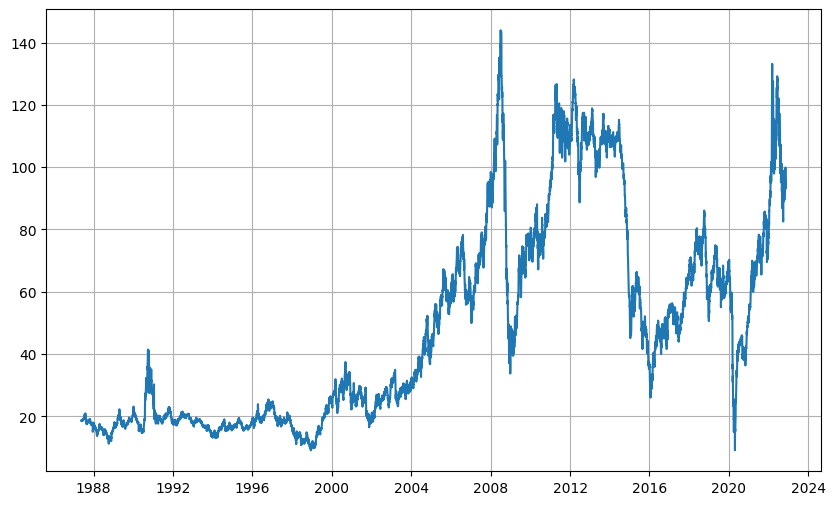

In [23]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Price'],linestyle='-')
plt.grid()

           0
0   1.000000
1   0.999165
2   0.998281
3   0.997440
4   0.996615
5   0.995746
6   0.994864
7   0.994047
8   0.993244
9   0.992431
10  0.991588
11  0.990764
12  0.989903
13  0.989015
14  0.988105
15  0.987148
16  0.986172
17  0.985169
18  0.984175
19  0.983213
20  0.982235
21  0.981229
22  0.980234
23  0.979248
24  0.978248
25  0.977192
26  0.976149
27  0.975117
28  0.974070
29  0.973008
30  0.971901
31  0.970815
32  0.969727
33  0.968635
34  0.967548
35  0.966458
36  0.965408
37  0.964340
38  0.963260
39  0.962163


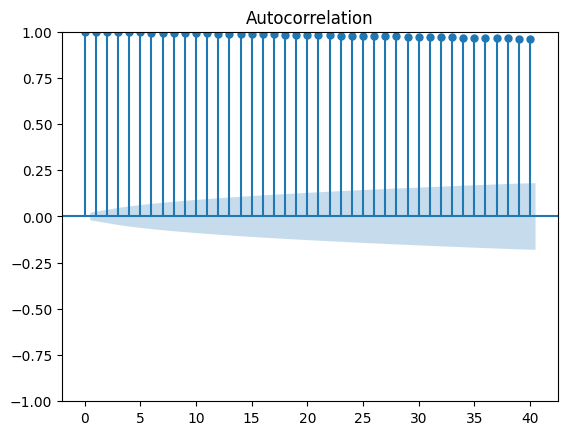

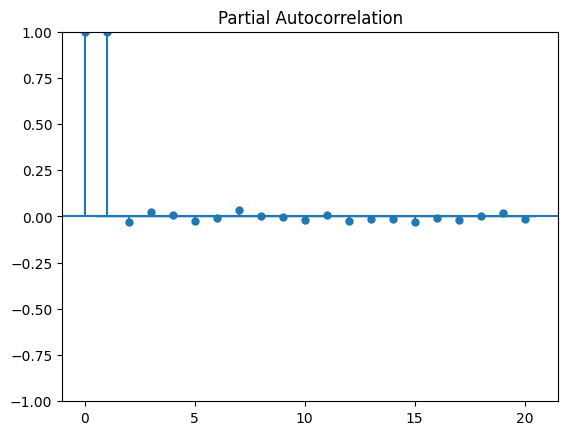

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
plot_acf(df['Price'],alpha=0.05)
plot_pacf(df['Price'],alpha=0.5,lags=20)
x_acf = pd.DataFrame(acf(df['Price']))
print(x_acf)

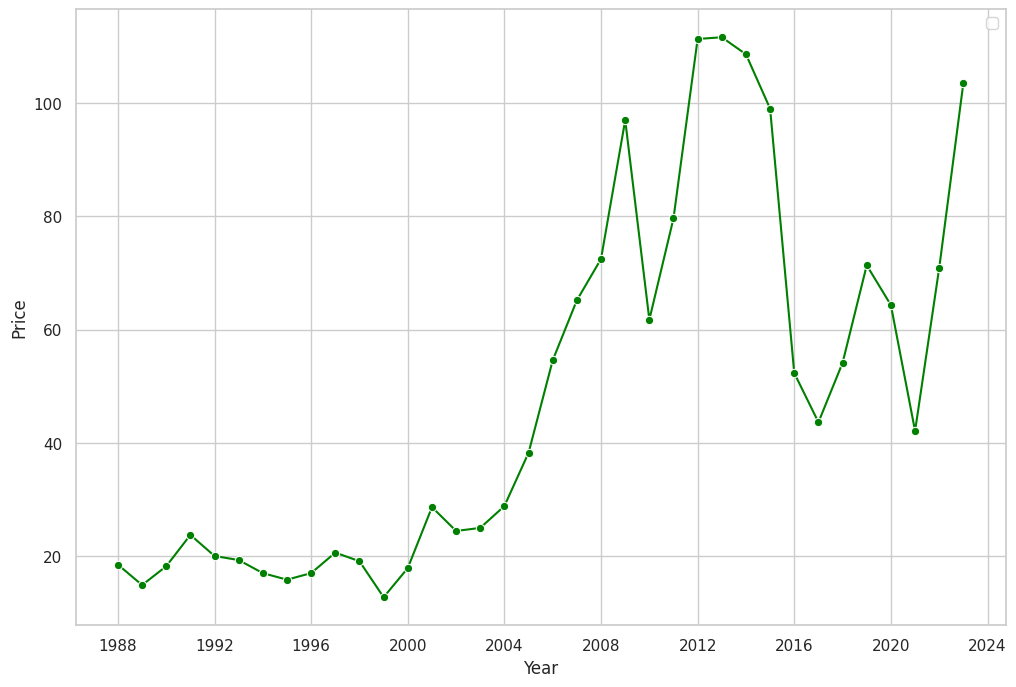

In [25]:
#AVERAGE PRICE FOR EACH YEAR
df_yearly_sum = df.resample('A').mean()
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.lineplot(x=df_yearly_sum.index,y='Price',data=df_yearly_sum,marker='o',color='green')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

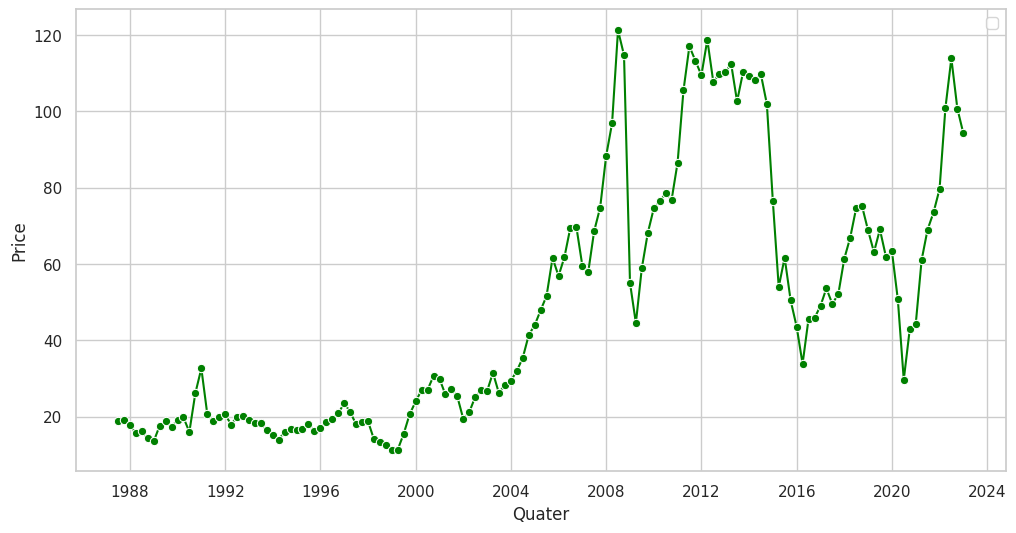

In [26]:
#AVERAGE PRICE QUATERLY
df_quaterly_sum = df.resample('Q').mean()
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(x=df_quaterly_sum.index,y='Price',data=df_quaterly_sum,marker='o',color='green')
plt.xlabel('Quater')
plt.ylabel('Price')
plt.legend()
plt.show()

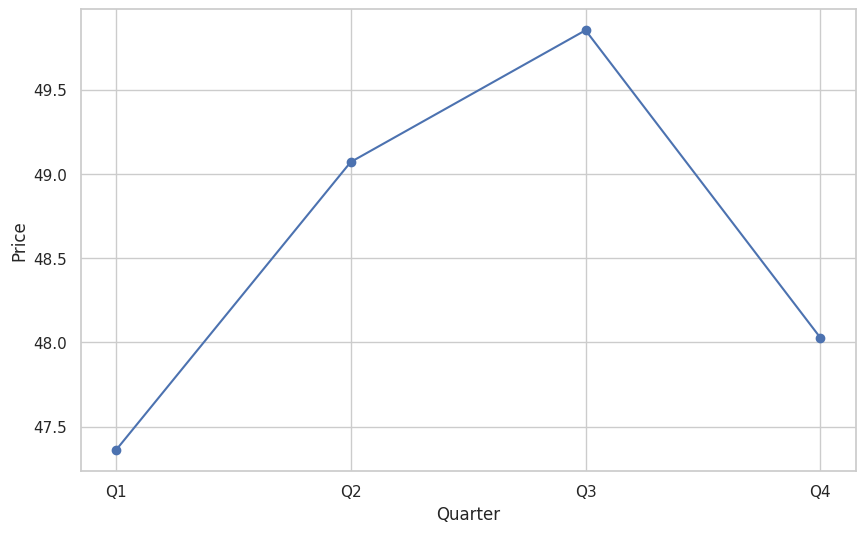

In [27]:
quarterly_mean = df.resample('Q')['Price'].mean()

q1_avg = quarterly_mean[quarterly_mean.index.quarter == 1].mean()
q2_avg = quarterly_mean[quarterly_mean.index.quarter == 2].mean()
q3_avg = quarterly_mean[quarterly_mean.index.quarter == 3].mean()
q4_avg = quarterly_mean[quarterly_mean.index.quarter == 4].mean()

plt.figure(figsize=(10,6))
plt.plot([1,2,3,4],[q1_avg,q2_avg,q3_avg,q4_avg],marker='o')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.xticks([1,2,3,4],['Q1','Q2','Q3','Q4'])
plt.show()

In [28]:
#DATA IS NOT STATIONARY SO WE HAVE TO MAKE IT STATIONARY
stationary_df = df['Price'] - df['Price'].shift()
adfuller_test(stationary_df.dropna())

ADF Test Statistics:-15.529367580048008
p-value:2.2307405105163768e-28
$LAGS USED:28
Number Of Observation:8981
Strong Evedience Against Null Hypothesis (Ho), Reject Null Hypothesis,Data is Stationary


<Axes: xlabel='Date'>

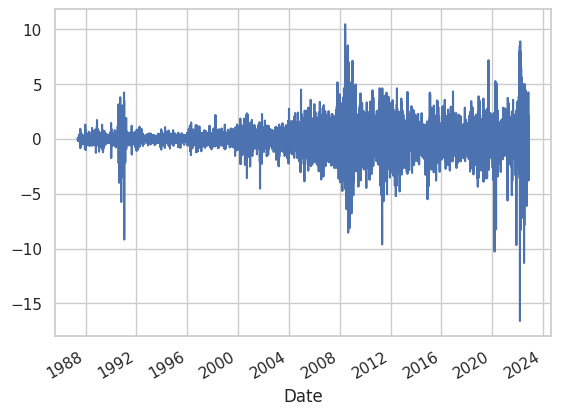

In [29]:
stationary_df.plot()

In [30]:
stationary_df

Date
1987-05-20     NaN
1987-05-21   -0.18
1987-05-22    0.10
1987-05-25    0.05
1987-05-26    0.03
              ... 
2022-11-08   -3.02
2022-11-09   -3.80
2022-11-10    1.20
2022-11-11    2.12
2022-11-14   -2.78
Name: Price, Length: 9011, dtype: float64

In [31]:
# Now New Rolling Statistics After Making Data Stationary

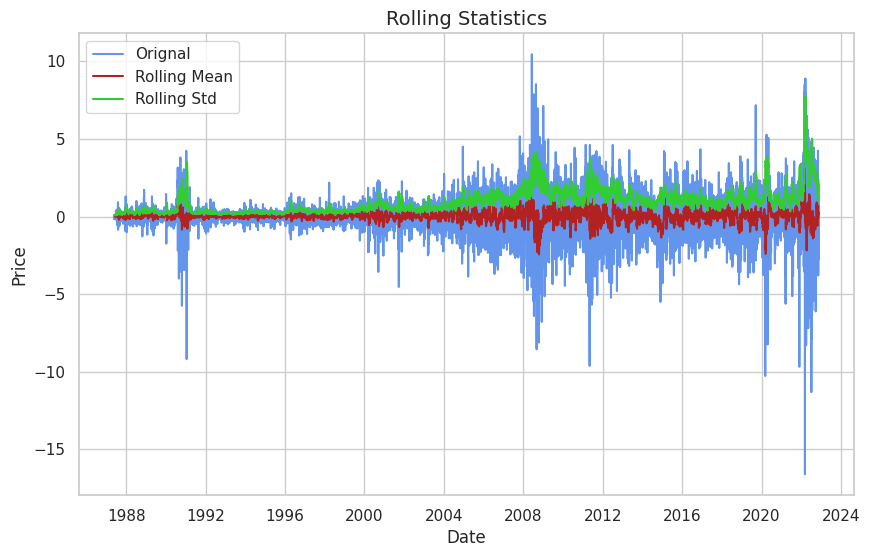

In [32]:
stationary_rolling_mean = stationary_df.rolling(window=12).mean()
stationary_rolling_std = stationary_df.rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(stationary_df,color='cornflowerblue',label='Orignal')
plt.plot(stationary_rolling_mean,color='firebrick',label='Rolling Mean')
plt.plot(stationary_rolling_std,color='limegreen',label='Rolling Std')
plt.xlabel('Date',size=12)
plt.ylabel('Price',size=12)
plt.legend(loc='upper left')
plt.title('Rolling Statistics',size=14)
plt.show()

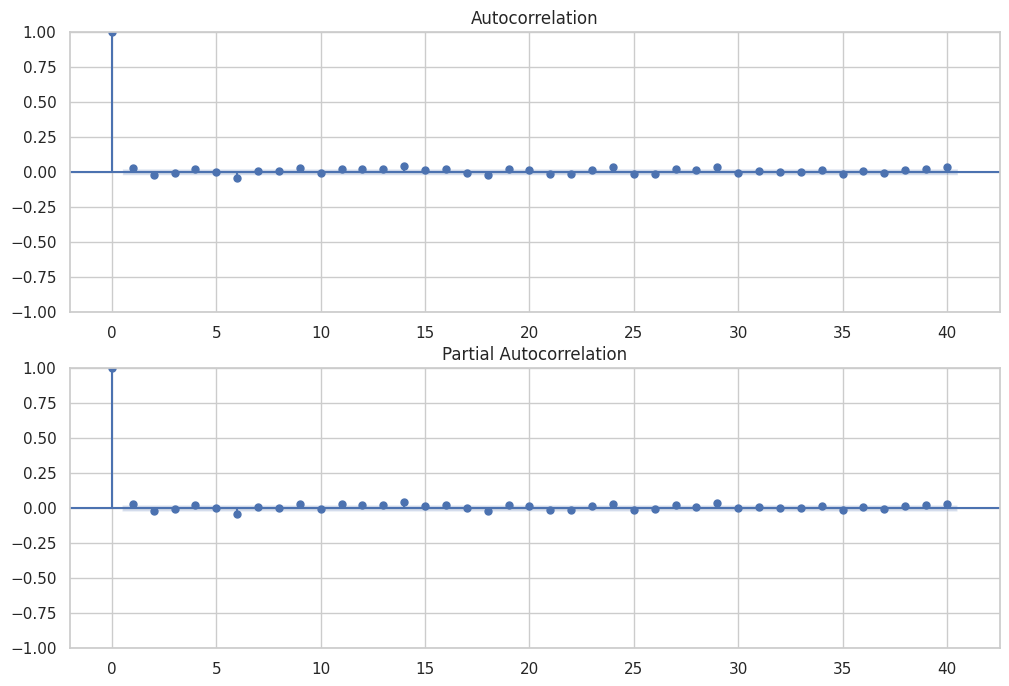

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(stationary_df,nlags=20)
lag_pacf = pacf(stationary_df,nlags=20)

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stationary_df.dropna(),lags=40,ax=ax)

ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stationary_df.dropna(),lags=40,ax=ax1)

In [34]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Price'],start_p=1,start_q=1,max_p=2,max_q=2,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=34.99 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=35097.444, Time=0.55 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=32434.246, Time=2.96 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=13.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=35099.296, Time=0.64 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=31476.789, Time=6.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=33.41 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=16.11 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=31482.626, Time=5.07 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=31471.677, Time=8.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=32432.928, Time=4.03 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=44.44 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=25.09 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=31469.778, Time=10.33 sec
 ARIMA(2,1,1)(1,1,0)[12]          

In [36]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [37]:
#SARIMA MODEL FOR WHOLE DATA

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(df['Price'],order=(2,1,1),seasonal_order=(2,1,1,12)).fit()
sarimax_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 9011
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood              -14556.325
Date:                            Mon, 19 May 2025   AIC                          29126.649
Time:                                    15:07:06   BIC                          29176.383
Sample:                                         0   HQIC                         29143.573
                                           - 9011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1815      0.217      0.838      0.402      -0.243       0.606
ar.L2         -0.0264      0.006     -4.162      0.000      -0.039      -0.014
ma.L1         -0.1562      0.217     -0.721      0.471      -0.581       0.268
ar.S.L12       0.0176      0.006      2.909      0.004       0.006       0.029
ar.S.L24       0.0311      0.006      5.545      0.000       0.020       0.042
ma.S.L12      -0.9945      0.001   -687.965      0.000      -0.997      -0.992
sigma2         1.4795      0.008    180.306      0.000       1.463       1.496
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             66653.43
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.08   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:

forecast_periods = 12
forecast = sarimax_model.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [40]:
forecast

In [41]:
sarimax_forecast = sarimax_model.forecast(30)
sarimax_forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


9011    93.410870
9012    93.654732
9013    93.705793
9014    93.623480
9015    93.577280
9016    93.942980
9017    93.885936
9018    93.746695
9019    93.560970
9020    93.731316
9021    93.835827
9022    93.634678
9023    93.625670
9024    93.755526
9025    93.912018
9026    93.876930
9027    93.868662
9028    94.239641
9029    94.180592
9030    93.988792
9031    93.756260
9032    93.939899
9033    94.038495
9034    93.757709
9035    93.731509
9036    93.908610
9037    94.011951
9038    93.945593
9039    93.960811
9040    94.211409
Name: predicted_mean, dtype: float64

In [42]:
start = len(df)
end = len(df) +len(test_data) - 1

In [43]:
pred = sarimax_model.predict(datrt=df.index[0],end=df.index[-1])

In [44]:
sarimax_pred = sarimax_model.predict(start=start,end=end, dynamic=False,typ='levels')
sarimax_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


9011    93.410870
9012    93.654732
9013    93.705793
9014    93.623480
9015    93.577280
9016    93.942980
9017    93.885936
9018    93.746695
9019    93.560970
9020    93.731316
9021    93.835827
9022    93.634678
Name: predicted_mean, dtype: float64

In [45]:
Forecast = sarimax_model.predict(len(df['Price']),len(df['Price'])+60)
Forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


9011    93.410870
9012    93.654732
9013    93.705793
9014    93.623480
9015    93.577280
          ...    
9067    94.212892
9068    94.363610
9069    94.396166
9070    94.195511
9071    94.173999
Name: predicted_mean, Length: 61, dtype: float64

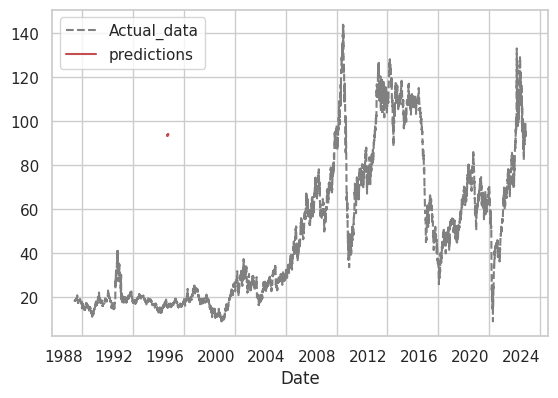

In [46]:
df['Price'].plot(style='--', color='grey',legend=True,label='Actual_data')
sarimax_forecast.plot(color='r',legend=True,label='predictions')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

print('MSE:',mean_squared_error(df['Price'],pred))
print('MAPE:',mean_absolute_percentage_error(df['Price'],pred))
print('R2_Score:',r2_score(df['Price'],pred))

MSE: 1.5267048906262128
MAPE: 0.016815011063685006
R2_Score: 0.9985859483562738


***PROPHET MODEL***

In [48]:
from prophet import Prophet
my_model = Prophet(interval_width=0.95)

In [49]:
data = df.rename(columns={'Date':'ds','Price':'y'})

In [50]:
my_model.fit(data)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
def detect_anomalies(series, threshold=3):
    rolling_mean = series.rolling(7,center=True).mean()
    rolling_std = series.rolling(7,center=True).std()
    anomalies = abs(series-rolling_mean) > (threshold * rolling_std)
    return anomalies.astype(int)
data['is_anomaly'] = detect_anomalies(data['y'])

In [ ]:
data['is_anomaly'].value_counts()

No Anomaly Detected

In [ ]:
future_dates = my_model.make_future_dataframe(periods=36,freq='MS')
future_dates

In [ ]:
Forcast = my_model.predict(future_dates)
Forcast[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
my_model.plot(Forcast,uncertainty=True)

In [ ]:
my_model.plot_components(Forcast)

In [ ]:
#Adding Change Points To Prophet

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(Forcast)
a = add_changepoints_to_plot(fig.gca(),my_model,Forcast)

In [ ]:
#The dates where changepoints occured

In [ ]:
my_model.changepoints

In [ ]:
#We can change the inferred changepoint range by setting the changepoint range
pro_change = Prophet(changepoint_range=0.9)
forcast = pro_change.fit(data).predict(future_dates)
fig = pro_change.plot(forcast)
a = add_changepoints_to_plot(fig.gca(),pro_change,forcast)

In [ ]:
#The number of changepoint set by using the n_components parameter when initializing prophet
pro_change = Prophet(n_changepoints=20,yearly_seasonality=True)
forecast = pro_change.fit(data).predict(future_dates)
fig = pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
#For Adjusting the Trends
pro_change = Prophet(n_changepoints=20,yearly_seasonality=True,changepoint_prior_scale=0.08)
forecast = pro_change.fit(data).predict(future_dates)
fig = pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
#Decreasing the changepoint_prior_scale to 0.001 to make thr trend less flexible
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True,changepoint_prior_scale=0.001)
forecast = pro_change.fit(data).predict(future_dates)
fig = pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),pro_change,forecast)

In [ ]:
data

In [ ]:
prophet_train_data = data.iloc[:-23]
prophet_test_data = data.iloc[-23:]


In [ ]:
prophet_model = Prophet()
prophet_model.fit(prophet_train_data)

In [ ]:
future = prophet_model.make_future_dataframe(periods=23,freq='YS')
prophet_predictions = prophet_model.predict(future)

In [ ]:
prophet_predictions.tail()

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(prophet_model, prophet_predictions)

In [ ]:
prophet_train_data['prophet_train_pred'] = prophet_predictions.iloc[:-23]['yhat']
prophet_test_data['prophet_test_pred'] = prophet_predictions.iloc[-23:]['yhat']


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE',mean_squared_error(prophet_train_data['y'],prophet_train_data['prophet_train_pred'])**0.5)
print('Test MSE',mean_squared_error(prophet_test_data['y'],prophet_test_data['prophet_test_pred'])**0.5)


@Prophet Model For Whole Data

In [ ]:
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(data)

In [ ]:
future = prophet_model.make_future_dataframe(periods=23,freq='YS')
prophet_predictions = prophet_model.predict(future)

In [ ]:
prophet_predictions.tail()

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(prophet_model, prophet_predictions)

In [ ]:
data['prophet_pred'] = prophet_predictions.iloc[:-23]['yhat']


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
print('MSE',mean_squared_error(data['y'],data['prophet_pred'])**0.5)
print('MAPE',mean_absolute_percentage_error(data['y'],data['prophet_pred']**0.5))

In [ ]:
r2_score(data['y'],data['prophet_pred'])

In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(prophet_model,open('prophet_model.pkl','wb'))

In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))

In [ ]:
pickle.dump(sarimax_model,open('sarimax_model.pkl','wb'))

In [ ]:
from IPython.display import FileLink
FileLink('df.pkl')
FileLink('sarimax_model.pkl')

In [ ]:
FileLink('prophet_model.pkl')